<a href="https://colab.research.google.com/github/Srinivas-8612/Machine-Learning/blob/main/ML_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Q-table:
          Clean    Move
A_dirty 23.0767 16.3569
A_clean 12.0767 16.3569
B_dirty 20.4568 18.4522
B_clean  9.4568 13.0811


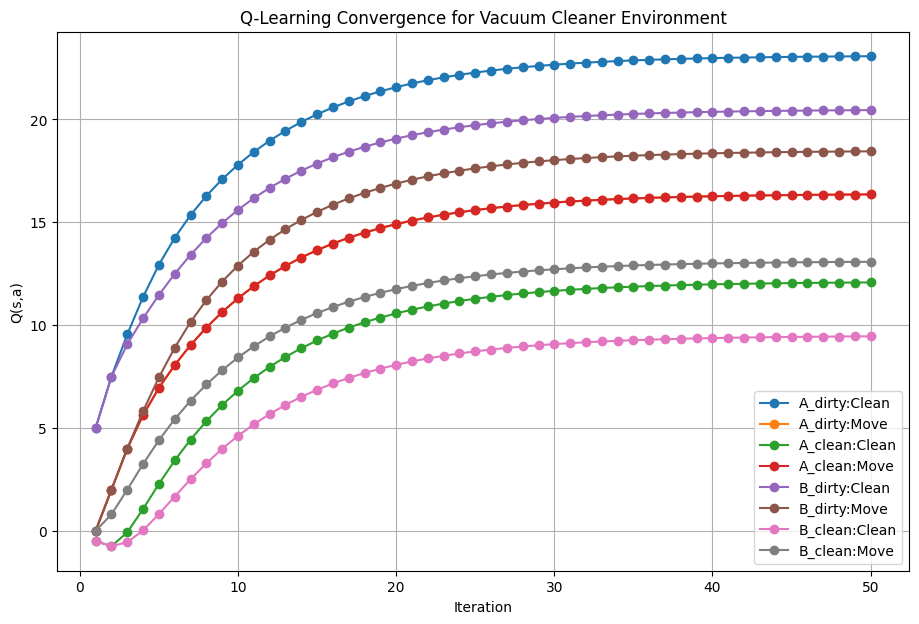

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

alpha = 0.5
gamma = 0.8

states = ["A_dirty", "A_clean", "B_dirty", "B_clean"]
actions = ["Clean", "Move"]

sequence = [
    ("A_dirty", "Move", "B_dirty"),
    ("B_dirty", "Move", "A_dirty"),
    ("A_dirty", "Clean", "A_clean"),
    ("A_clean", "Clean", "A_clean"),
    ("A_clean", "Move", "B_dirty"),
    ("B_dirty", "Clean", "B_clean"),
    ("B_clean", "Clean", "B_clean"),
    ("B_clean", "Move", "A_clean"),
]

def reward(state, action):
    if action == "Clean":
        return 10 if "dirty" in state else -1
    return 0

Q = {s: {a: 0.0 for a in actions} for s in states}

def max_Q(s):
    return max(Q[s].values())

iters = list(range(1, 51))
traj_Q = {f"{s}:{a}": [] for s in states for a in actions}

for it in iters:
    for (s, a, s_next) in sequence:
        r = reward(s, a)
        target = r + gamma * max_Q(s_next)
        Q[s][a] += alpha * (target - Q[s][a])
    for s in states:
        for a in actions:
            traj_Q[f"{s}:{a}"].append(Q[s][a])

# print final Q-table
print("Final Q-table:")
Q_df = pd.DataFrame(Q).T  # convert dict → DataFrame
Q_df = Q_df[["Clean", "Move"]]  # enforce column order
print(Q_df.to_string(float_format=lambda x: f"{x:0.4f}"))

# Convert to CSV
df = pd.DataFrame({"iteration": iters, **traj_Q})
df.to_csv("vacuum_Q_values.csv", index=False)

# Plot trajectories
plt.figure(figsize=(11,7))
for key in traj_Q.keys():
    plt.plot(iters, traj_Q[key], label=key, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Q(s,a)")
plt.title("Q-Learning Convergence for Vacuum Cleaner Environment")
plt.legend()
plt.grid(True)
plt.show()



Final Q-table:
          Clean     Up   Down   Left  Right
A_dirty 10.0000 8.0000 8.0000 8.0000 8.0000
B_dirty 10.0000 8.0000 8.0000 8.0000 8.0000
C_dirty 10.0000 8.0000 8.0000 8.0000 8.0000
D_dirty 10.0000 8.0000 8.0000 8.0000 8.0000
A_clean -1.0000 0.0000 0.0000 0.0000 0.0000
B_clean -1.0000 0.0000 0.0000 0.0000 0.0000
C_clean -1.0000 0.0000 0.0000 0.0000 0.0000
D_clean -1.0000 0.0000 0.0000 0.0000 0.0000


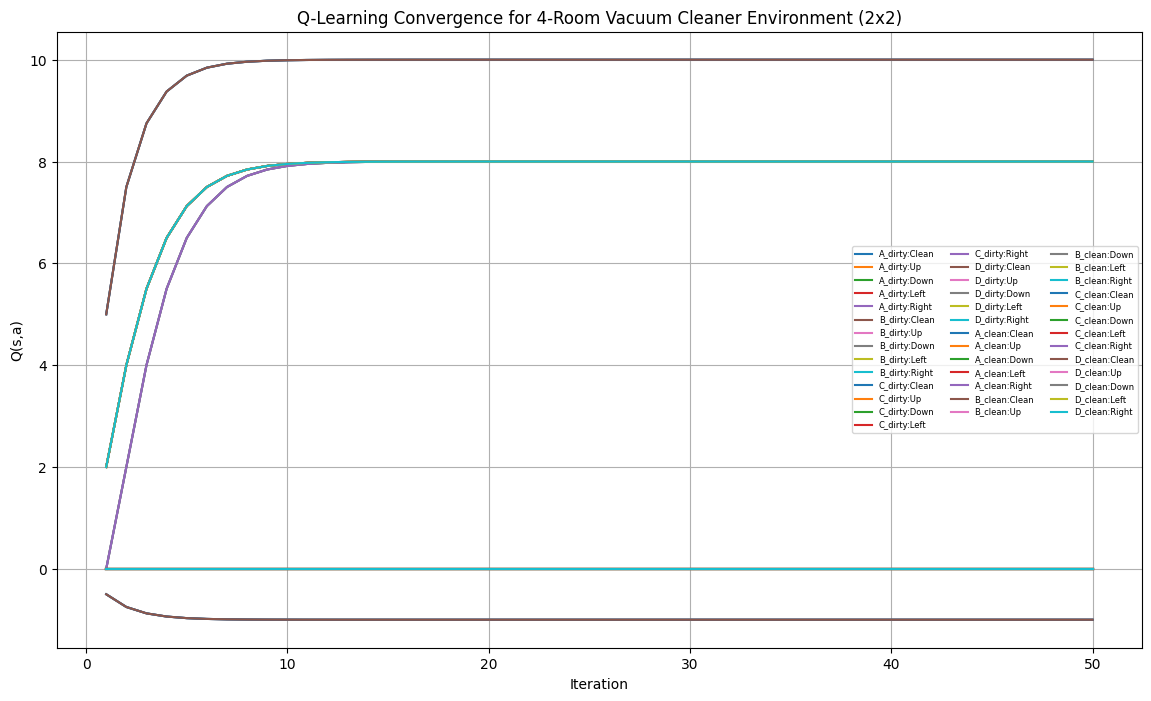

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

alpha = 0.5
gamma = 0.8

rooms = ["A", "B", "C", "D"]
states = [r + "_dirty" for r in rooms] + [r + "_clean" for r in rooms]

actions = ["Clean", "Up", "Down", "Left", "Right"]

# Grid layout and movements
moves = {
    "A": {"Up":"A", "Down":"C", "Left":"A", "Right":"B"},
    "B": {"Up":"B", "Down":"D", "Left":"A", "Right":"B"},
    "C": {"Up":"A", "Down":"C", "Left":"C", "Right":"D"},
    "D": {"Up":"B", "Down":"D", "Left":"C", "Right":"D"},
}

# Transition sequence (cyclic deterministic example)
sequence = []
for r in rooms:
    dirty = r + "_dirty"
    clean = r + "_clean"

    # Clean transitions
    sequence.append((dirty, "Clean", clean))
    sequence.append((clean, "Clean", clean))

    # All movement transitions
    for a in ["Up", "Down", "Left", "Right"]:
        next_room = moves[r][a]
        sequence.append(
            (dirty, a, next_room + "_dirty")
        )
        sequence.append(
            (clean, a, next_room + "_clean")
        )

def reward(state, action):
    if action == "Clean":
        return 10 if "dirty" in state else -1
    return 0

# Initialize Q-table
Q = {s: {a: 0.0 for a in actions} for s in states}

def max_Q(s):
    return max(Q[s].values())

# Run 50 iterations
iters = list(range(1, 51))
traj_Q = {f"{s}:{a}": [] for s in states for a in actions}

for it in iters:
    for (s, a, s_next) in sequence:
        r = reward(s, a)
        target = r + gamma * max_Q(s_next)
        Q[s][a] += alpha * (target - Q[s][a])

    for s in states:
        for a in actions:
            traj_Q[f"{s}:{a}"].append(Q[s][a])

# Print final Q-table neatly
print("\nFinal Q-table:")
Q_df = pd.DataFrame(Q).T
Q_df = Q_df[["Clean", "Up", "Down", "Left", "Right"]]
print(Q_df.to_string(float_format=lambda x: f"{x:0.4f}"))

# Save CSV
df = pd.DataFrame({"iteration": iters, **traj_Q})
df.to_csv("vacuum_Q_values_4room.csv", index=False)

# Plot trajectories
plt.figure(figsize=(14,8))
for key in traj_Q.keys():
    plt.plot(iters, traj_Q[key], label=key)
plt.xlabel("Iteration")
plt.ylabel("Q(s,a)")
plt.title("Q-Learning Convergence for 4-Room Vacuum Cleaner Environment (2x2)")
plt.legend(fontsize=6, ncols=3)
plt.grid(True)
plt.show()
